In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

%run /gfs/devel/ddanko/notebook-init.py

# load R libraries                                                                                    
%R invisible(library(ggplot2))
%R invisible(library(fastcluster))
%R invisible(library(reshape))
%R invisible(library(reshape2))
%R invisible(library(gplots))
%R invisible(library(RSQLite))

#set up ggplot2 defaults                                                                              
%R theme_set(theme_gray(base_size=18))

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/kraken.dir/species.kraken.aggregated.counts.tsv.gz"
                              human.anterior_nares.R011132.species.kraken.counts.tsv.gz_count
Streptococcus_phage_K13                                                                     1
Gentian_ovary_ring-spot_virus                                                               5
                              human.anterior_nares.R012663.species.kraken.counts.tsv.gz_count
Streptococcus_phage_K13                                                                     0
Gentian_ovary_ring-spot_virus                                                               2
                              human.anterior_nares.R011132.species.kraken.counts.tsv.gz_count
Streptococcus_phage_K13                                                                     1
Gentian_ovary_ring-spot_virus                                                               5
                            

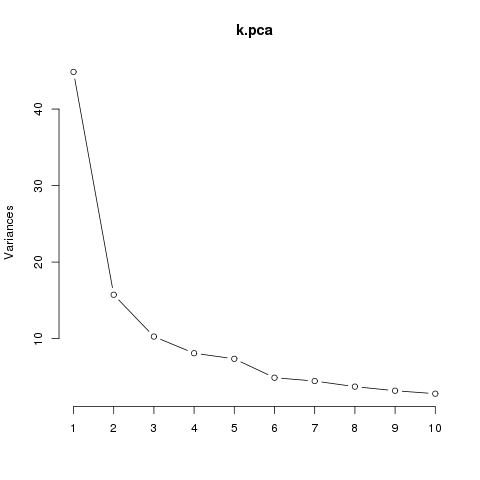

In [8]:
%%R

##########################################################
##########################################################
#
# KRAKEN
#
##########################################################
##########################################################


tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/kraken.dir/species.kraken.aggregated.counts.tsv.gz')
print(tableNames)

k.classes <- c()
kraken <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    print(tbl[1:2,1:2])
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})
    
    tbl[is.na(tbl)] <- 0
    print(tbl[1:2,1:2])
    tbl <- data.matrix(tbl)
    print(tbl[1:2,1:2])
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    print(tbl[1:2,1:2])
    tbl <- apply(tbl,1:2,max,0)
    print(tbl[1:2,1:2])
    tbl <- tbl[apply(tbl, 1, function(row) any(row !=0 )),]
    print(dim(tbl))
        print(tbl[1:2,1:2])

    k.classes <- c(k.classes,  unlist(classesInTbl))
    kraken <- merge(kraken,tbl,by="row.names",all=T)
    kraken[is.na(kraken)] <- 0 
    rownames(kraken) <- kraken[,1]
    kraken <- kraken[,-1]
}
k.classes <- as.factor(k.classes)
print(k.classes)
print(kraken[1:2,])
                    
k.pca <- prcomp(t(kraken),center=T,scale=T)
plot(k.pca,type='l')

[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/g_pig/acdmndfast.dir/species.acdmndfast.aggregated.counts.tsv.gz"      
[2] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/mouse/acdmndfast.dir/species.acdmndfast.aggregated.counts.tsv.gz"      
[3] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/sheep_rumen/acdmndfast.dir/species.acdmndfast.aggregated.counts.tsv.gz"
 [1] gpigfecal.dna        gpigfecal.dna        gpigfecal.dna       
 [4] gpigfecal.dna        gpigfecal.dna        gpigfecal.dna       
 [7] gpigfecal.dna        gpigfecal.dna        filtered.stool.day14
[10] filtered.stool.day0  filtered.stool.day0  filtered.stool.day14
[13] filtered.stool.day0  filtered.stool.day0  filtered.stool.day14
[16] filtered.stool.day0  filtered.stool.day0  filtered.stool.day0 
[19] filtered.stool.day14 filtered.stool.day14 filtered.stool.day14
[22] filtered.stool.day14 filtered.stool.day14 filtered.stool.day0 
[25] rumen.rnahigh        rumen.rnal

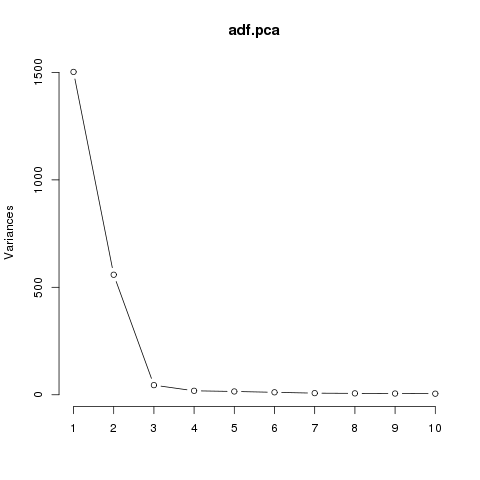

In [372]:
%%R

##########################################################
##########################################################
#
# AC-DIAMOND FAST
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/*/*dmndfast.dir/species.*dmndfast.aggregated.counts.tsv.gz')
print(tableNames)

adf.classes <- c()
acdmndfast <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})

    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    tbl <- tbl[apply(tbl, 1, function(row) all(row !=0 )),]

    adf.classes <- c(adf.classes,  unlist(classesInTbl))
    acdmndfast <- merge(acdmndfast,tbl,by="row.names",all=T)
    acdmndfast[is.na(acdmndfast)] <- 0 

    rownames(acdmndfast) <- acdmndfast[,1]
    acdmndfast <- acdmndfast[,-1]
}
adf.classes <- factor(adf.classes)
print(adf.classes)

print(length(adf.classes))
print(dim(acdmndfast))
print(acdmndfast[1:5,1:4])
                     

adf.pca <- prcomp(t(acdmndfast),center=T,scale=T)
plot(adf.pca,type='l')                    


[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/g_pig/acdmnd.dir/species.acdmnd.aggregated.counts.tsv.gz"
[1] gpigfecal.dna gpigfecal.dna gpigfecal.dna gpigfecal.dna gpigfecal.dna
[6] gpigfecal.dna gpigfecal.dna gpigfecal.dna
Levels: gpigfecal.dna
[1] 8
[1] 742   8
                          gpigfecal.dna.R496699_count
Acaricomes_phytoseiuli                       4.330867
Acaryochloris_marina                         7.389760
Acetohalobium_arabaticum                     6.652795
Achromobacter_piechaudii                     6.915829
Acidaminococcus_intestini                    8.375261
                          gpigfecal.dna.R496625_count
Acaricomes_phytoseiuli                       3.649429
Acaryochloris_marina                         6.649429
Acetohalobium_arabaticum                     6.536954
Achromobacter_piechaudii                     6.082388
Acidaminococcus_intestini                    8.338728
                          gpigfecal.dna.R496700_count
Acaricomes_p

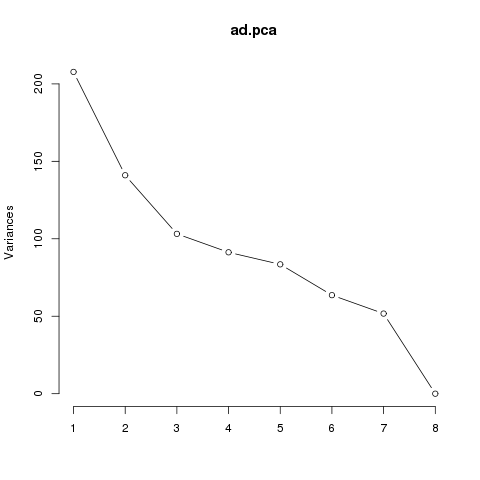

In [373]:
%%R

##########################################################
##########################################################
#
# AC-DIAMOND
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/*/*dmnd.dir/species.*dmnd.aggregated.counts.tsv.gz')
print(tableNames)

ad.classes <- c()
acdmnd <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})

    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    tbl <- tbl[apply(tbl, 1, function(row) all(row !=0 )),]
        
    ad.classes <- c(ad.classes,  unlist(classesInTbl))
        
    acdmnd <- merge(acdmnd,tbl,by="row.names",all=T)
    acdmnd[is.na(acdmnd)] <- 0 

    rownames(acdmnd) <- acdmnd[,1]
    acdmnd <- acdmnd[,-1]
}
ad.classes <- factor(ad.classes)
print(ad.classes)

print(length(ad.classes))
print(dim(acdmnd))
print(acdmnd[1:5,1:4])
                     
ad.pca <- prcomp(t(acdmnd),center=T,scale=T)
plot(ad.pca,type='l')


In [385]:
%%R

##########################################################
##########################################################
#
# METAPHLAN2
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/*/metaphlan2.dir/*.mp2prof.tsv')

m.classes <- c()
mphlan <- matrix(0,0,0)
for (tblName in tableNames){
    print(tblName)
    tbl <- read.table(tblName,blank.lines.skip=T,sep="\t",row.names=1)
    class <- tail(strsplit(strsplit(tblName,'-R')[[1]][1],'/')[[1]],1)
    sample <- tail(strsplit(strsplit(tblName,'\\.mp2')[[1]][1],'/')[[1]],1)
    genera <- rownames(tbl)[grep('g__',rownames(tbl))]
    genera <- genera[grep('s__',genera,invert=T)]
    tbl <-tbl[rownames(tbl) %in% genera,,drop=F]
    m.classes <- c(m.classes,class)
    newcolnames <- c(colnames(mphlan),sample)
    mphlan <- merge(mphlan,tbl,by="row.names",all=T)
    mphlan[is.na(mphlan)] <- 0
    rownames(mphlan) <- mphlan[,1]
    mphlan <- mphlan[,-1,drop=F]
    colnames(mphlan) <- newcolnames
}
m.classes <- factor(m.classes)
print(m.classes)
print(mphlan[1:5,1:4])

m.pca <- prcomp(t(mphlan),center=T,scale=T)
plot(m.pca,type='l')





[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983262.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983263.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983264.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983265.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983266.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983267.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R983268.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/cow_rumen/metaphlan2.dir/cowrumen-dna-R9832

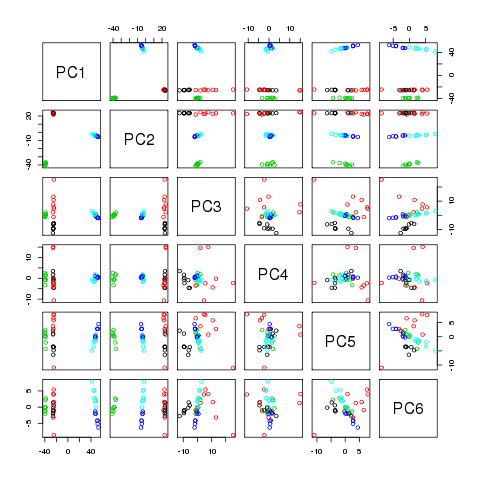

In [337]:
%%R
library(ggplot2)

#pairs(adf.pca$x[,1:6],pch=21,bg=rainbow(length(unique(adf.classes)))[unclass(adf.classes)])
pairs(adf.pca$x[,1:6],pch=21,col=adf.classes)


In [286]:
%%R

##########################################################
##########################################################
#
# PCA Plots
#
##########################################################
##########################################################

library(ggplot2)
library(gridExtra)
library(factoextra)

plotPCA <- function(comps, pca, classes){
    
    df <- data.frame(pca$x)
    df[,"class"] <- classes 
    combs <- combn(comps,2,simplify=F)

    for (comb in combs){

        p <- fviz_pca_ind(pca, axes=comb, geom = "point",
                    habillage=classes, addEllipses=TRUE,
                    ellipse.level= 0.95)+ theme_minimal()
                print(p) 
    }
}


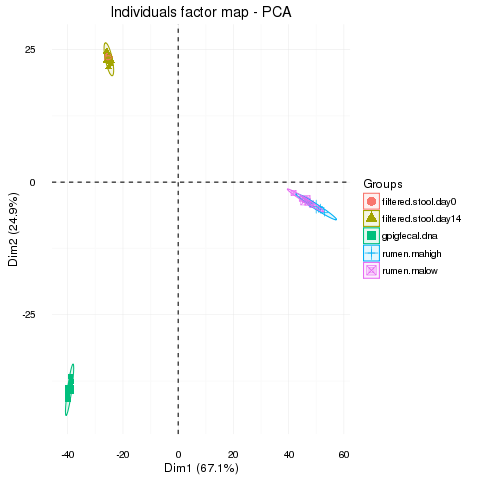

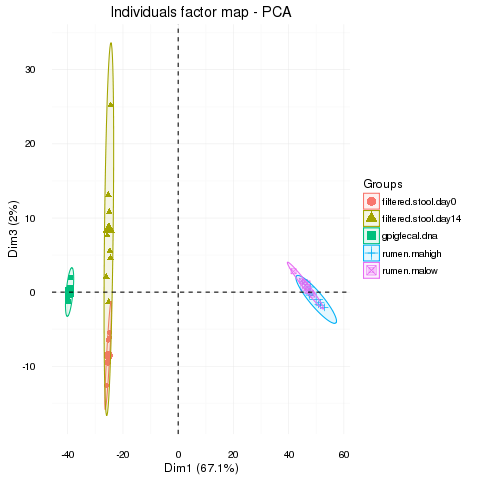

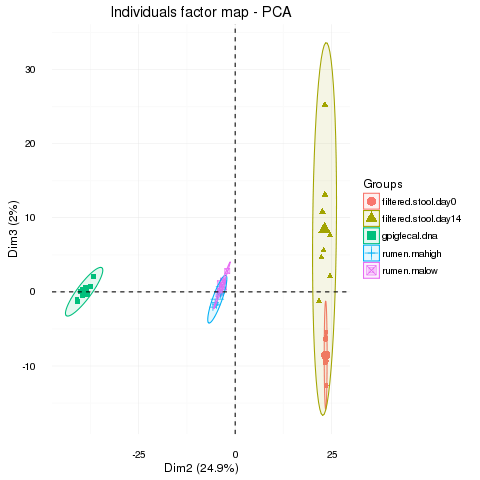

In [366]:
%%R

plotPCA(1:3, adf.pca, adf.classes)

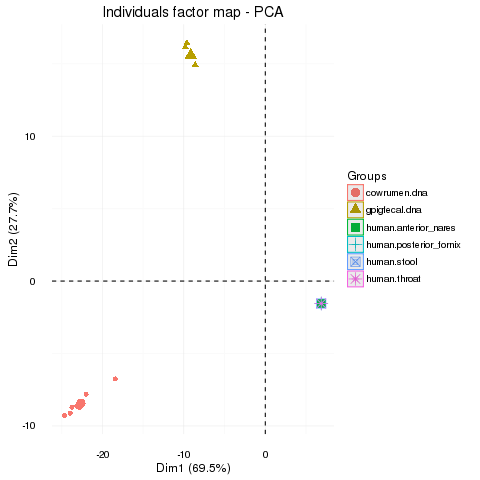

In [386]:
%%R
plotPCA(1:2, k.pca, k.classes)

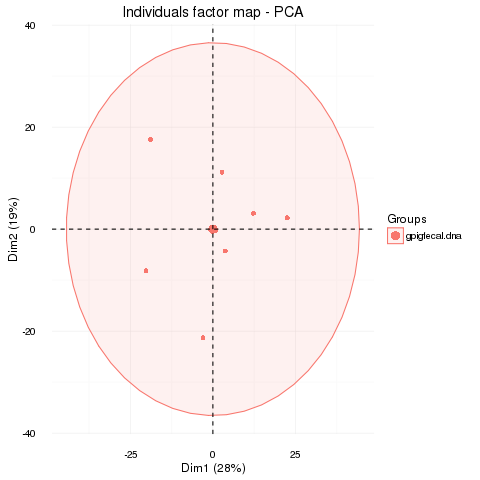

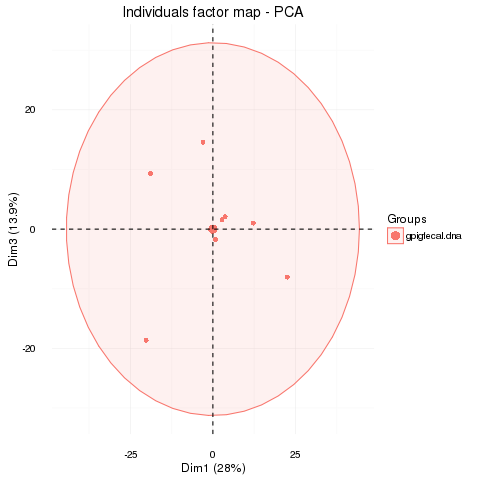

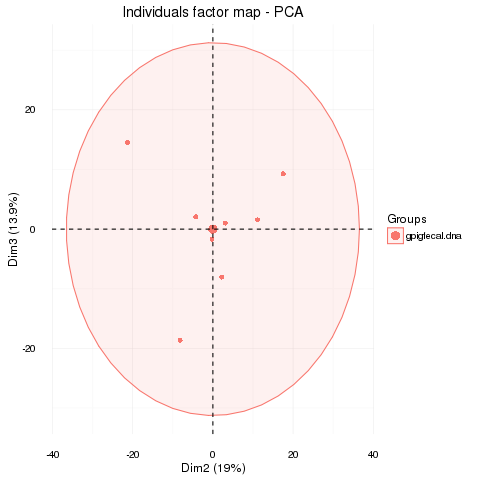

In [347]:
%%R

plotPCA(1:3, ad.pca, ad.classes)

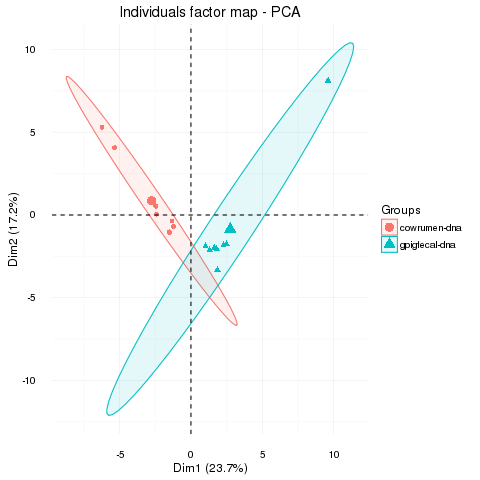

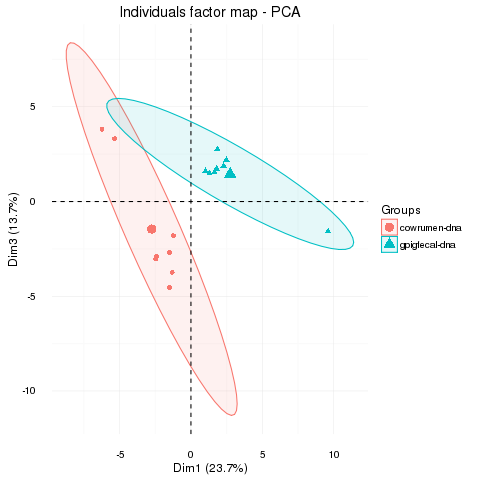

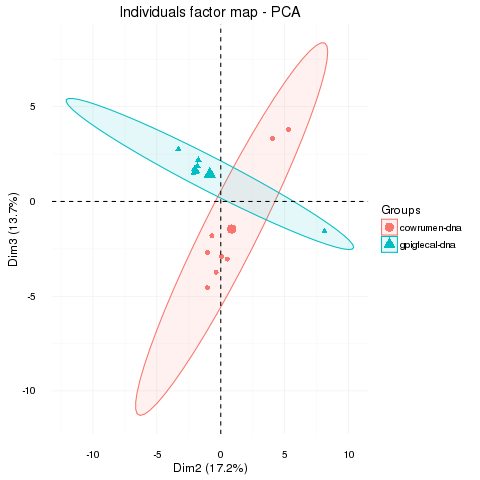

In [384]:
%%R
plotPCA(1:3, m.pca, m.classes)